# 기저함수 모형과 과최적화
- `기저함수 basis function`
    - "모형진단과 수정"에서 독립변수와 종속변수가 비선형 관계인 경우 독립변수를 "비선형 변환"하여 모형의 성능을 높이는 방법에 대한 내용
    - 기저함수를 사용한 다항회귀 모형을 통해 데이터의 비선형성을 보완할 수 있다.
    - 비선형 함수 > 기저함수들 > 다항기저함수 > 다항회귀모델
- `과최적화 overfitting`
    - 분석모형이 데이터에 과도하게 최적화 된 상태
    - 원인 : 
        - 독립변수의 수 보다 모수의 수가 많은 경우
        - 독립변수간 독립이 아닌 경우
        - 다항회귀 등의 방법으로 모형의 차수를 크게 증가시키는 경우
    - 과최적화로 인한 현상 :
        - cross-validaion 오차 : 새로운 테스트 데이터에 대한 오차가 큼
        - 추정의 부정확함 : 샘플이 조금만 바뀌어도 모수값이 크게 변함

## 1. 비선형 모형
- 기본적인 선형회귀모형 : 입력변수의 선형조합과 같다.
    - $y_i = \sum_{i=1}^{D} w_ix_i = w^Tx$
- 데이터가 비선형이면 이러한 선형회귀예측모형은 적합하지 않다.
- 이러한 경우는 **독립변수 x를 입력변수를 갖는 여러개의 비선형 함수들**을 생각해내어 원래 변수 x대신에 사용하여 모형을 만들면 더 좋은 예측 성능을 갖을 수도 있다.
    - 즉 비선형 변수 x대신에 여러개의 비선형 함수들로 예측모형을 만든다는 의미
    - $y_i = \sum_{j=1}^{M} w_j\phi_j \;\; (\phi = phi)$

In [46]:
def make_nonlinear(seed=0) : 
    np.random.seed(seed)
    n_samples = 30
    # 균일분포를 따르는 샘플 생성 np.random.rand
    X = np.sort(np.random.rand(n_samples))
    # 표준정규분포를 따르는 샘플 생성 np.random.randn
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

In [47]:
np.random.seed(0)
n_samples = 30

In [48]:
np.sort(np.random.rand(n_samples))

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [49]:
np.random.randn(n_samples)

array([ 0.8644362 , -0.74216502,  2.26975462, -1.45436567,  0.04575852,
       -0.18718385,  1.53277921,  1.46935877,  0.15494743,  0.37816252,
       -0.88778575, -1.98079647, -0.34791215,  0.15634897,  1.23029068,
        1.20237985, -0.38732682, -0.30230275, -1.04855297, -1.42001794,
       -1.70627019,  1.9507754 , -0.50965218, -0.4380743 , -1.25279536,
        0.77749036, -1.61389785, -0.21274028, -0.89546656,  0.3869025 ])

#### 비선형 데이터 샘플의 분포

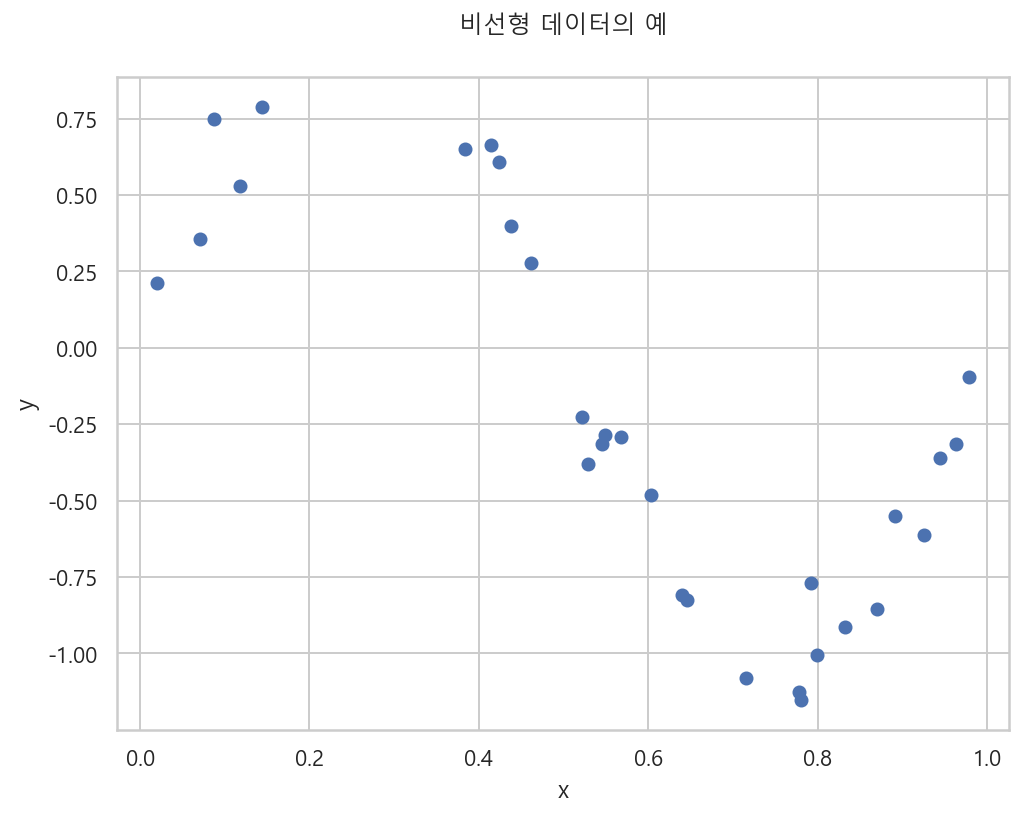

In [50]:
%matplotlib inline

X, y = make_nonlinear()

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title("비선형 데이터의 예",y=1.05)
plt.xlabel("x")
plt.ylabel("y")
plt.show() ; 

## 2. 기저함수
- `기저함수 basis function` : 특정한 규칙에 따라서 만들어지는 함수의 열(sequence)로서 충분히 많은 수의 함수가 있으면 어떤 모양의 함수라도 비슷하게 흉내낼 수 있다. 
- 데이터가 비선형인 경우 독립변수 x를 입력값으로하는 여러개의 비선형 함수들 \phi_j를 만들어서 새로운 모형을 만들어 주면 좋은데, 이러한 비선형 함수를 충분히 많이 생각해 내기 어렵다. 
    - 따라서 기저함수를 사용한다.
- `다항기저함수 polynomial basis function` : 기저함수 중 가장 간단한 것, 독립변수의 차수가 일정하게 늘어남
    - $\phi_0(x) = 1, \phi_1(x) = x, \phi_2(x) = x^2, \phi_3(x) = x^3, \cdots$
- `다항회귀 polynomial regression` : 다항기저함수를 사용하는 기저함수 모형    
    - $y = w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M$
- 기저함수는 특정한 규칙에 의해서 자동으로 생성된다. 따라서 비선형 함수를 만들기 위해서 고민할 필요가 없다.    

### 2-1. 여러가지 기저함수
- 체비세프 다항식 : 직교기저함수의 한 종류
    - `직교기저함수 orthogonal basis function` : 서로 다른 두 기저함수의 곱의 정적분 값이 0인 기저함수
- 에르미트 다항식
- 라게르 다항식
- 방사 기저함수
- 삼각 기저함수
- 시그모이드 기저함수

#### 함수처럼 사용가능하다.
- phi_0(5)

In [51]:
phi_0 = np.polynomial.Polynomial.basis(1)
phi_1 = np.polynomial.Polynomial.basis(1)
phi_2 = np.polynomial.Polynomial.basis(2)
phi_3 = np.polynomial.Polynomial.basis(3)

In [52]:
type(phi_0)

numpy.polynomial.polynomial.Polynomial

In [53]:
phi_0

Polynomial([0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [54]:
phi_1

Polynomial([0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [55]:
phi_1(5)

5.0

In [56]:
phi_2

Polynomial([0., 0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [57]:
phi_3

Polynomial([0., 0., 0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [58]:
x = np.linspace(-1, 1, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

#### 다항기저함수

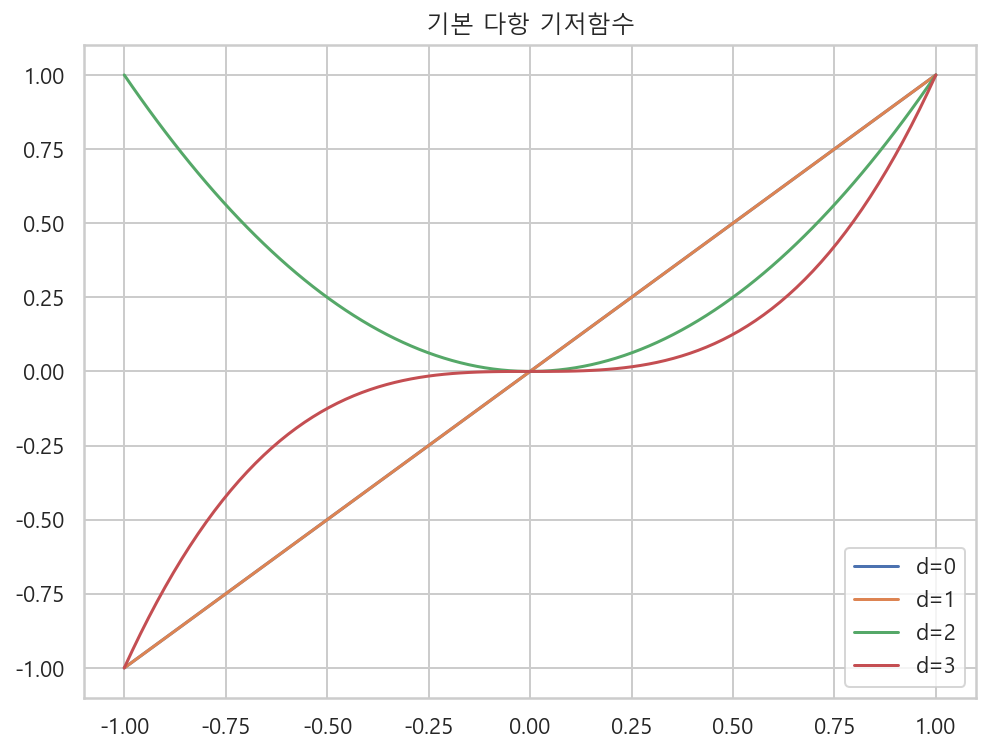

In [59]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")

plt.legend()
plt.title("기본 다항 기저함수")

plt.show() ; 

### 2-2. 체비세프 다항식
- `직교기저함수 orthogonal basis function` : 서로 다른 두 기저함수의 곱의 정적분 값이 0인 기저함수

In [60]:
phi_0 = np.polynomial.chebyshev.Chebyshev.basis(0)
phi_1 = np.polynomial.chebyshev.Chebyshev.basis(1)
phi_2 = np.polynomial.chebyshev.Chebyshev.basis(2)
phi_3 = np.polynomial.chebyshev.Chebyshev.basis(3)

In [61]:
type(phi_0)

numpy.polynomial.chebyshev.Chebyshev

In [62]:
phi_0

Chebyshev([1.], domain=[-1.,  1.], window=[-1.,  1.])

In [63]:
phi_0(5)

1.0

In [64]:
phi_1

Chebyshev([0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [65]:
phi_2

Chebyshev([0., 0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [66]:
phi_3

Chebyshev([0., 0., 0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [67]:
x = np.linspace(-1, 1, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

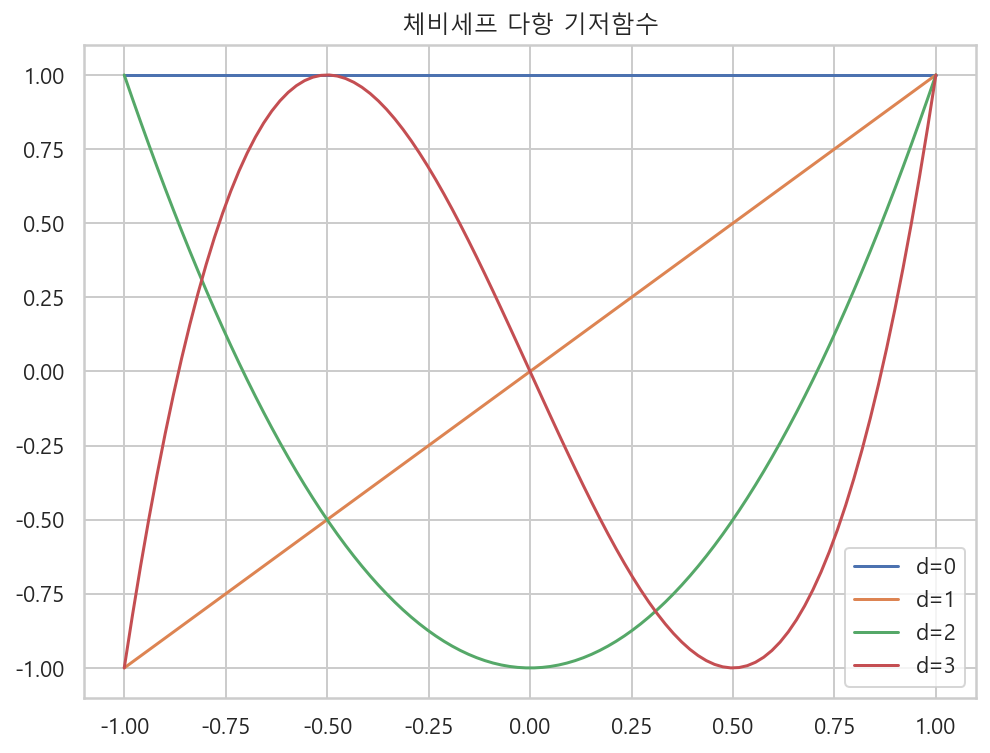

In [68]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")

plt.title("체비세프 다항 기저함수")
plt.legend()
plt.show() ; 

### 2-3. 에르미트 다항식
- hermite polynomial
- 특징
    - 홀수차항의 에르미트 함수는 원점을 지나고, 짝수차항의 에르미트 함수는 x=0에서 미분계수가 0이된다. 
- https://namu.wiki/w/%EC%97%90%EB%A5%B4%EB%AF%B8%ED%8A%B8%20%ED%95%A8%EC%88%98

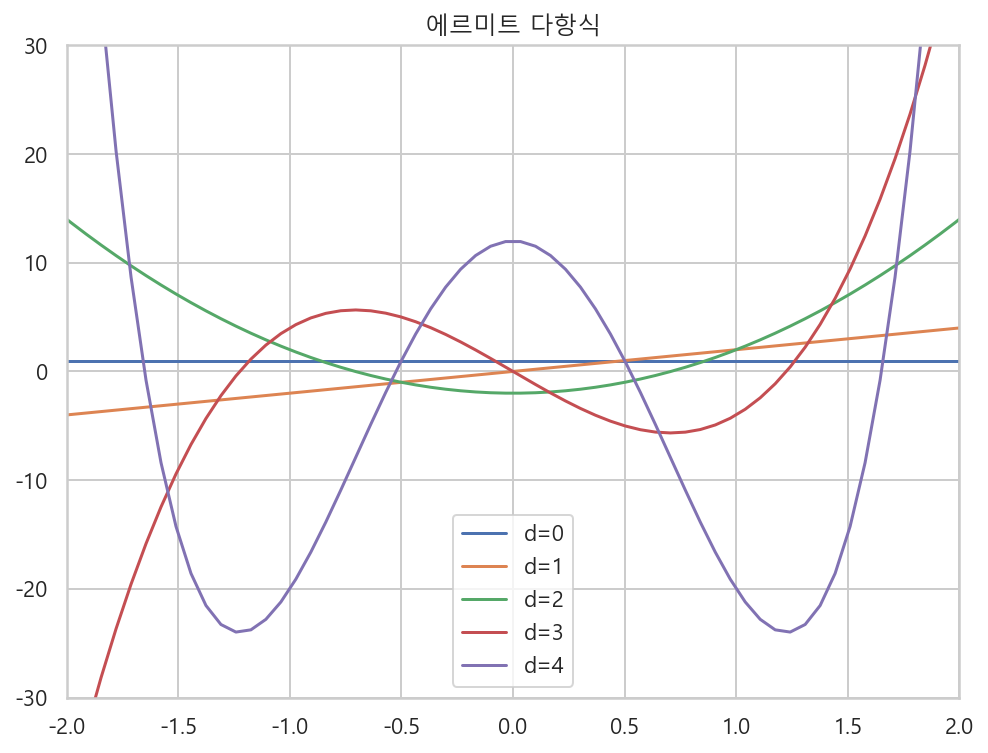

In [69]:
phi_0 = np.polynomial.hermite.Hermite.basis(0)
phi_1 = np.polynomial.hermite.Hermite.basis(1)
phi_2 = np.polynomial.hermite.Hermite.basis(2)
phi_3 = np.polynomial.hermite.Hermite.basis(3)
phi_4 = np.polynomial.hermite.Hermite.basis(4)

x = np.linspace(-5, 5, 150)

plt.figure(figsize=(8, 6))
plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.plot(x, phi_4(x), label="d=4")

plt.xlim(-2, 2)
plt.ylim(-30, 30)

plt.title("에르미트 다항식")

plt.legend()
plt.show() ; 

### 2-4. 라게르 다항식
- laguerre polynomial
- 특징 
    - Ln(0) = 1
    - 라게르 함수끼리 내적했을 때 가중치를 e^{-x}로 설정하면 직교집합이 된다.
- https://namu.wiki/w/%EB%9D%BC%EA%B2%8C%EB%A5%B4%20%ED%95%A8%EC%88%98?from=%EB%9D%BC%EA%B2%8C%EB%A5%B4%20%EB%8B%A4%ED%95%AD%EC%8B%9D

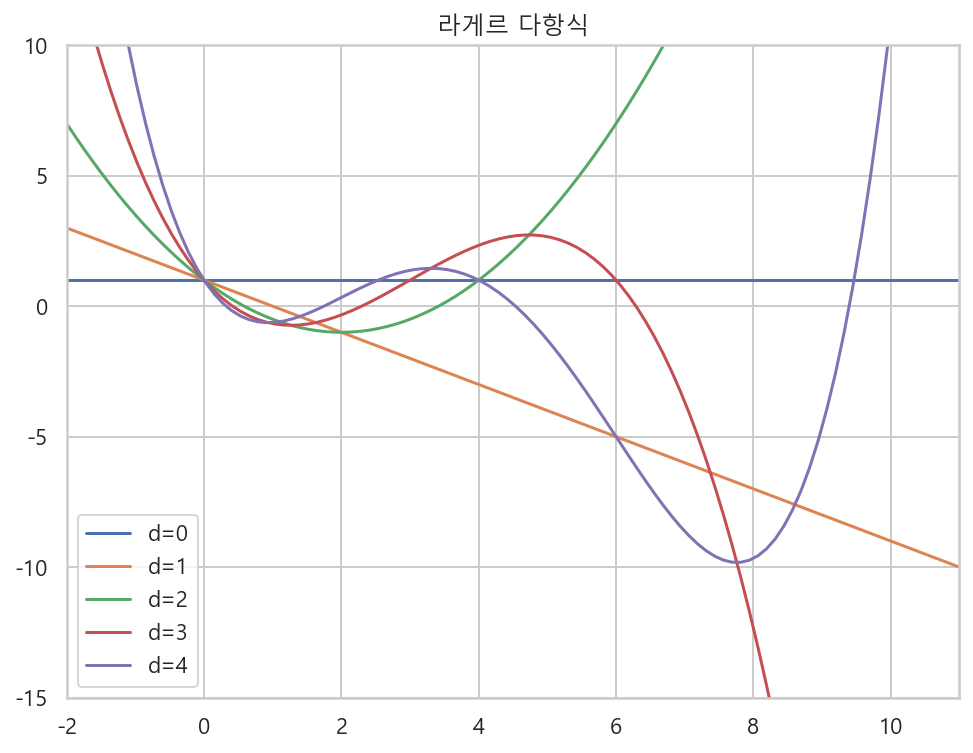

In [70]:
phi_0 = np.polynomial.laguerre.Laguerre.basis(0)
phi_1 = np.polynomial.laguerre.Laguerre.basis(1)
phi_2 = np.polynomial.laguerre.Laguerre.basis(2)
phi_3 = np.polynomial.laguerre.Laguerre.basis(3)
phi_4 = np.polynomial.laguerre.Laguerre.basis(4)

x = np.linspace(-5, 20, 200)

plt.figure(figsize=(8, 6))
plt.plot(x, phi_0(x), label="d=0")
plt.plot(x, phi_1(x), label="d=1")
plt.plot(x, phi_2(x), label="d=2")
plt.plot(x, phi_3(x), label="d=3")
plt.plot(x, phi_4(x), label="d=4")

plt.xlim(-2, 11)
plt.ylim(-15, 10)

plt.title("라게르 다항식")

plt.legend()
plt.show() ; 

## 3. stats models를 사용한 다항회귀
- OLS 클래스의 from_formula 메서드를 사용하여 다항회귀를 할 수 있다.

In [71]:
X

array([[0.0202184 ],
       [0.07103606],
       [0.0871293 ],
       [0.11827443],
       [0.14335329],
       [0.38344152],
       [0.41466194],
       [0.4236548 ],
       [0.43758721],
       [0.46147936],
       [0.52184832],
       [0.52889492],
       [0.54488318],
       [0.5488135 ],
       [0.56804456],
       [0.60276338],
       [0.63992102],
       [0.64589411],
       [0.71518937],
       [0.77815675],
       [0.78052918],
       [0.79172504],
       [0.79915856],
       [0.83261985],
       [0.87001215],
       [0.891773  ],
       [0.92559664],
       [0.94466892],
       [0.96366276],
       [0.97861834]])

In [72]:
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,const,x,y
0,1.0,0.020218,0.213138
1,1.0,0.071036,0.357444
2,1.0,0.087129,0.747487
3,1.0,0.118274,0.531167
4,1.0,0.143353,0.788347


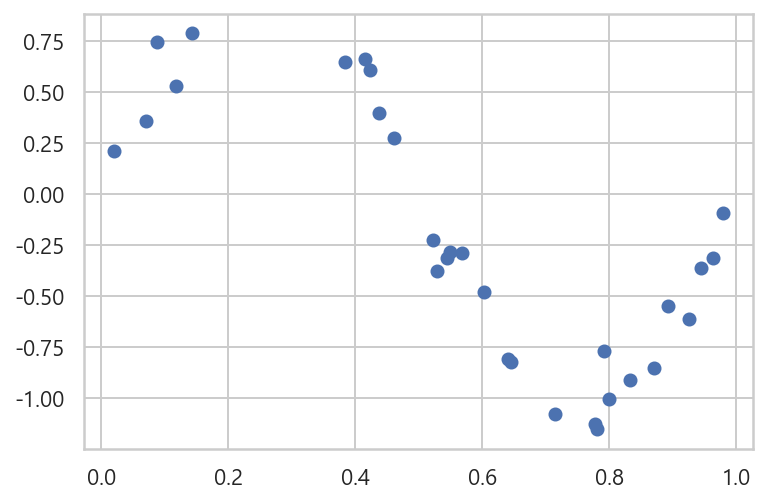

In [73]:
plt.scatter(df.x, df.y)
plt.show() ; 

In [74]:
print(sm.OLS.from_formula("y~x", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.69e-06
Time:                        14:33:11   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

### 3-1. 다항기저함수를 추가하여 다항회귀
- w_1x + w_2x^2

In [75]:
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     18.38
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           9.14e-06
Time:                        14:33:14   Log-Likelihood:                -14.953
No. Observations:                  30   AIC:                             35.91
Df Residuals:                      27   BIC:                             40.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8638      0.248      3.487      0.0

### 3-2. 기저함수를 추가하여 다항회귀 2
- w_1x + w_2x^2 + w_3x^3

In [76]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.06e-17
Time:                        14:33:17   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

### 3-3. 3가지 모형의 회귀분석 결과

In [91]:
def make_nonlinear(seed, n) : 
    np.random.seed(seed)
    n_samples = n
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

In [95]:
def polyreg(degree, seed=0, n=30, ax=None) : 
    X, y = make_nonlinear(seed, n)
    
    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)
    
    # OLS 클래스의 formula식 생성
    model_str = "y ~ "
    for i in range(degree) : 
        if i == 0 :
            prefix = ""
        else : 
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    # OLS 모델 생성
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()
    print("degree {} : {}".format(degree, model_str))
    
    # 예측값 그래프 : 함수 호출시 ax값이 아규먼트로 주어지는 경우
    if ax : 
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        
        # 위에서 만든 모형에 새로운 데이터 xx를 넣고 예측값 결과 그래프
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("차수 = {}, 시드값 = {}, n = {}".format(degree, seed, n))
        
        # x label 설정 : params에서 "dtype" 부분을 제거 하기 위한 방법
        #xlabel = "\n".join(str(result.params).split("\n")[:-1])
        ## r2 값 추가
        r2_str = ["\nRsquared   " + str(round(result.rsquared, 3))]
        xlabel = "\n".join(str(result.params).split("\n")[:-1] + r2_str)
        font = {"family" : "NanumGothic", "color" : "red", "size" : 10}
        ax.set_xlabel(xlabel, fontdict=font)
        
    return result

degree 1 : y ~ I(x**1)
degree 2 : y ~ I(x**1) + I(x**2)
degree 3 : y ~ I(x**1) + I(x**2) + I(x**3)


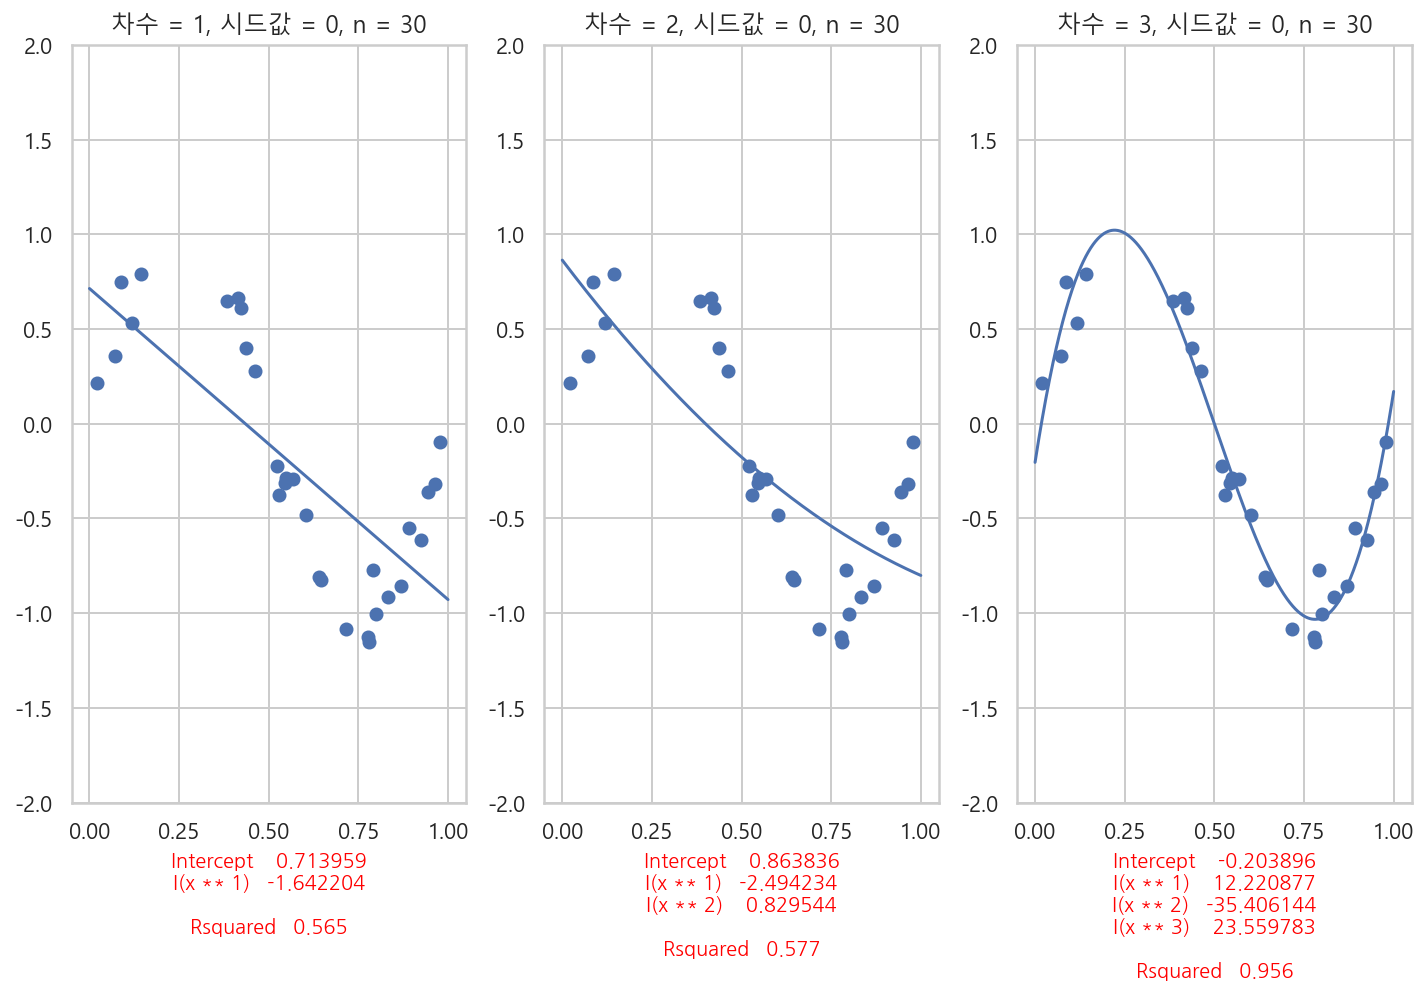

In [96]:
plt.figure(figsize=(10, 7))

ax1 = plt.subplot(131)
polyreg(1, ax=ax1)

ax2 = plt.subplot(132)
polyreg(2, ax=ax2)

ax3 = plt.subplot(133)
polyreg(3, ax=ax3)

plt.tight_layout()
plt.show() ; 

#### formula 식 생성하는 부분

In [79]:
model_str = "y ~ "
for i in range(5) : 
    if i == 0 : 
        prefix = ""
    else : 
        prefix = " + "
    model_str += prefix + "I(x**{})".format(i + 1)
    print(model_str)

y ~ I(x**1)
y ~ I(x**1) + I(x**2)
y ~ I(x**1) + I(x**2) + I(x**3)
y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4)
y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5)


#### 그래프의 x label 값 설정
- params의 값을 str로 바꾼다. 
- split 함수를 사용하여 분할한다.
- join 함수를 사용하여 합한다. 

In [80]:
model_3 = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     186.7
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.06e-17
Time:                        14:33:29   Log-Likelihood:                 18.883
No. Observations:                  30   AIC:                            -29.77
Df Residuals:                      26   BIC:                            -24.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2039      0.109     -1.876      0.0

In [81]:
result_3.params

Intercept    -0.203896
x            12.220877
I(x ** 2)   -35.406144
I(x ** 3)    23.559783
dtype: float64

In [82]:
str(result_3.params).split("\n")

['Intercept    -0.203896',
 'x            12.220877',
 'I(x ** 2)   -35.406144',
 'I(x ** 3)    23.559783',
 'dtype: float64']

In [83]:
"\n".join(str(result_3.params).split("\n")[:-1])

'Intercept    -0.203896\nx            12.220877\nI(x ** 2)   -35.406144\nI(x ** 3)    23.559783'

#### 그래프의 xlabel 에 r2 값 추가 코드
```
r2_str = ["\nRsquared   " + str(round(result.rsquared, 3))]
xlabel = "\n".join(str(result.params).split("\n")[:-1] + r2_str)
```

## 4. 과최적화
- `과최적화 overfitting` : 모형을 특정한 샘플에 대해서 과도하게 최적화하는 것
    - 모형이 데이터에 너무 딱 들어맞는다는 의미
- 과최적화가 발생하는 경우 : 조건에 대한 해답이 복수개 존재할 수 있다.
    - 독립변수 데이터 갯수에 비해서 모형 모수의 수가 과도하게 큰 경우
    - 독립변수 데이터가 서로 독립이 아닌 경우
- 과최적화가 문제가 되는 이유
    - **cross-validation 오차** : 트레이닝에 사용되지 않은 새로운 독립변수 값을 입력하면 오차가 커진다. 즉 테스트 데이터를 모형에 적용하면 오차가 커짐.
    - **추정의 부정확함** : 샘플이 조금만 변화해도 가중치 계수의 값이 크게 달라진다.

### 4-1. 새로운 x데이터가 들어오면 오차가 커짐
- degree 값을 크게 설정하여 모형을 과최적화 한다.
- polyreg 함수에서 예측값을 그리기 위해 새로운 데이터 xx가 모형에 들어가면 오차가 커지는 것을 볼 수 있다.
- **원본 데이터의 샘플 개수가 늘어나면 과최적화가 작아지는 것 같음**

degree 10 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10)
degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)
degree 30 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20) + I(x**21) + I(x**22) + I(x**23) + I(x**24) + I(x**25) + I(x**26) + I(x**27) + I(x**28) + I(x**29) + I(x**30)


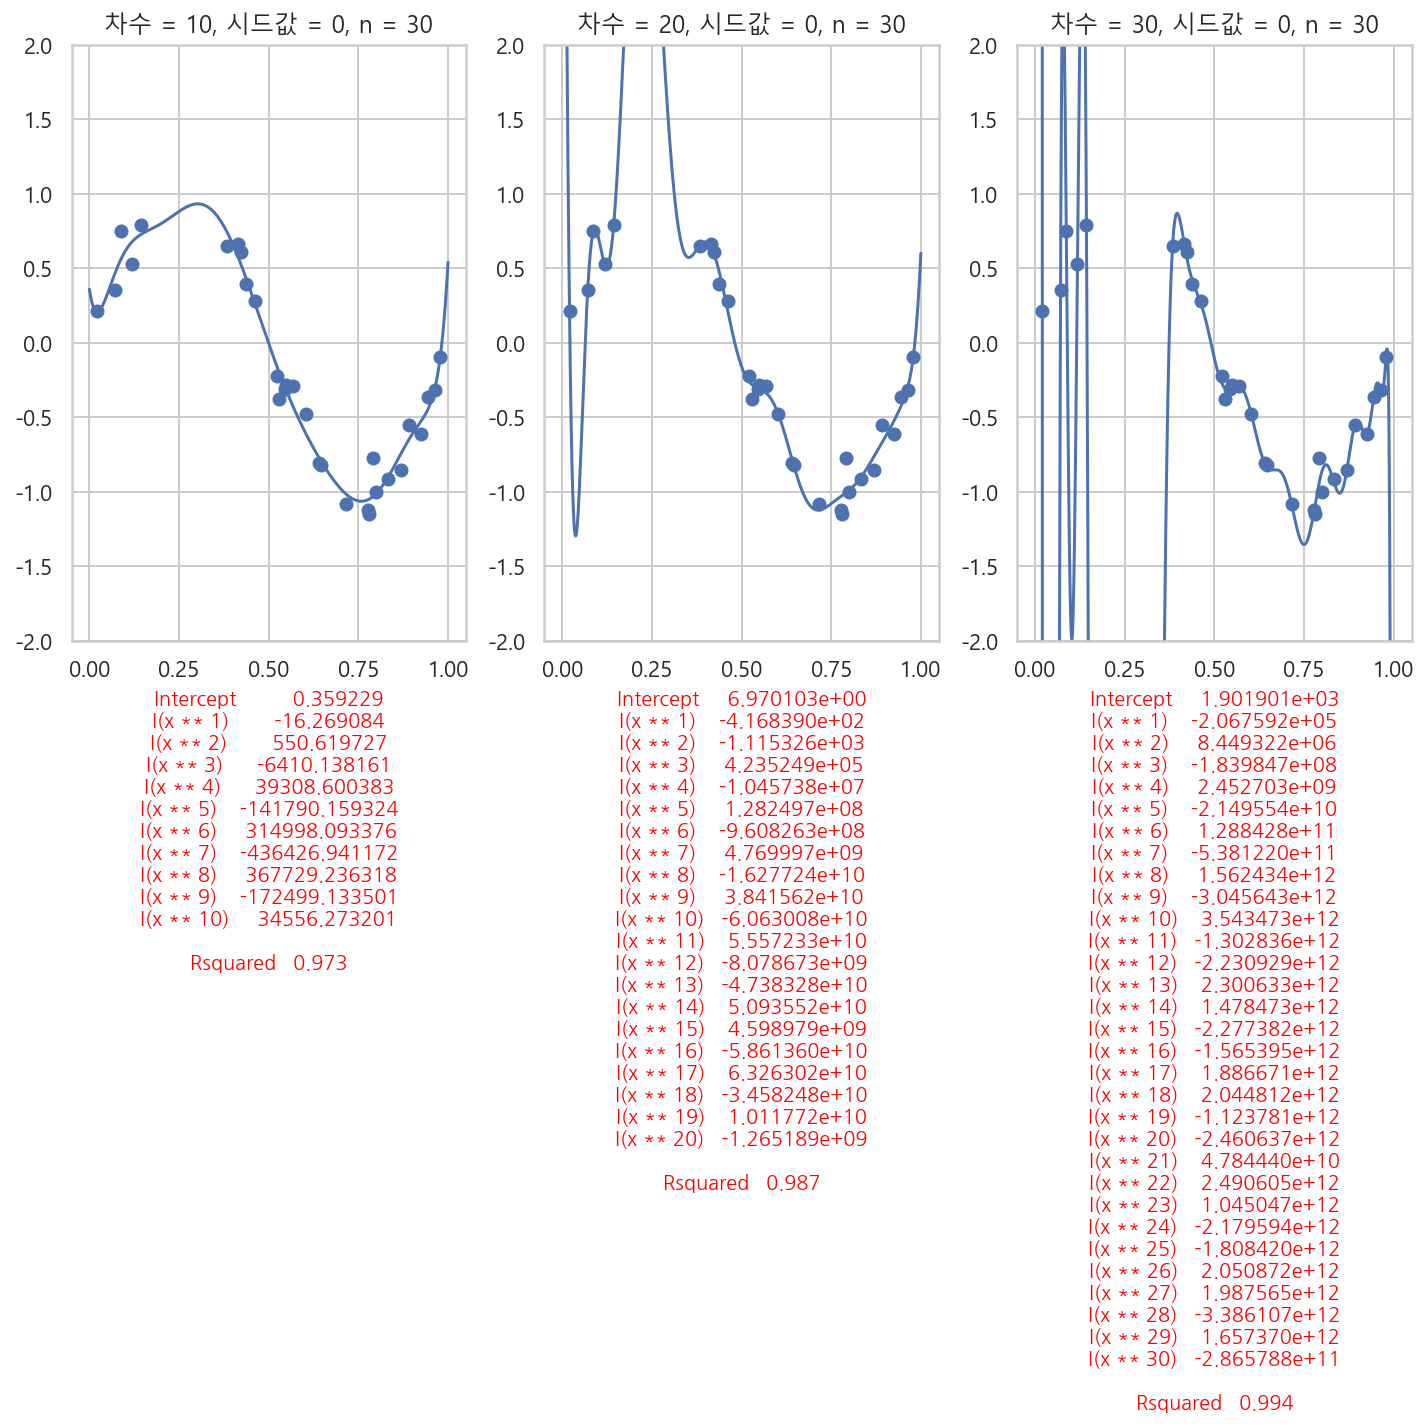

In [97]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(131)
polyreg(10, ax=ax1)

ax2 = plt.subplot(132)
polyreg(20, ax=ax2)

ax3 = plt.subplot(133)
polyreg(30, ax=ax3)

plt.tight_layout()
plt.show() ; 

### 샘플 수가 증가하면 과최적화가 작아지나?
- n : 30 -> 50
- 위에서 샘플수 30개의 과최적화 모형에서의 오차가 작아짐

degree 10 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10)
degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)
degree 30 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20) + I(x**21) + I(x**22) + I(x**23) + I(x**24) + I(x**25) + I(x**26) + I(x**27) + I(x**28) + I(x**29) + I(x**30)


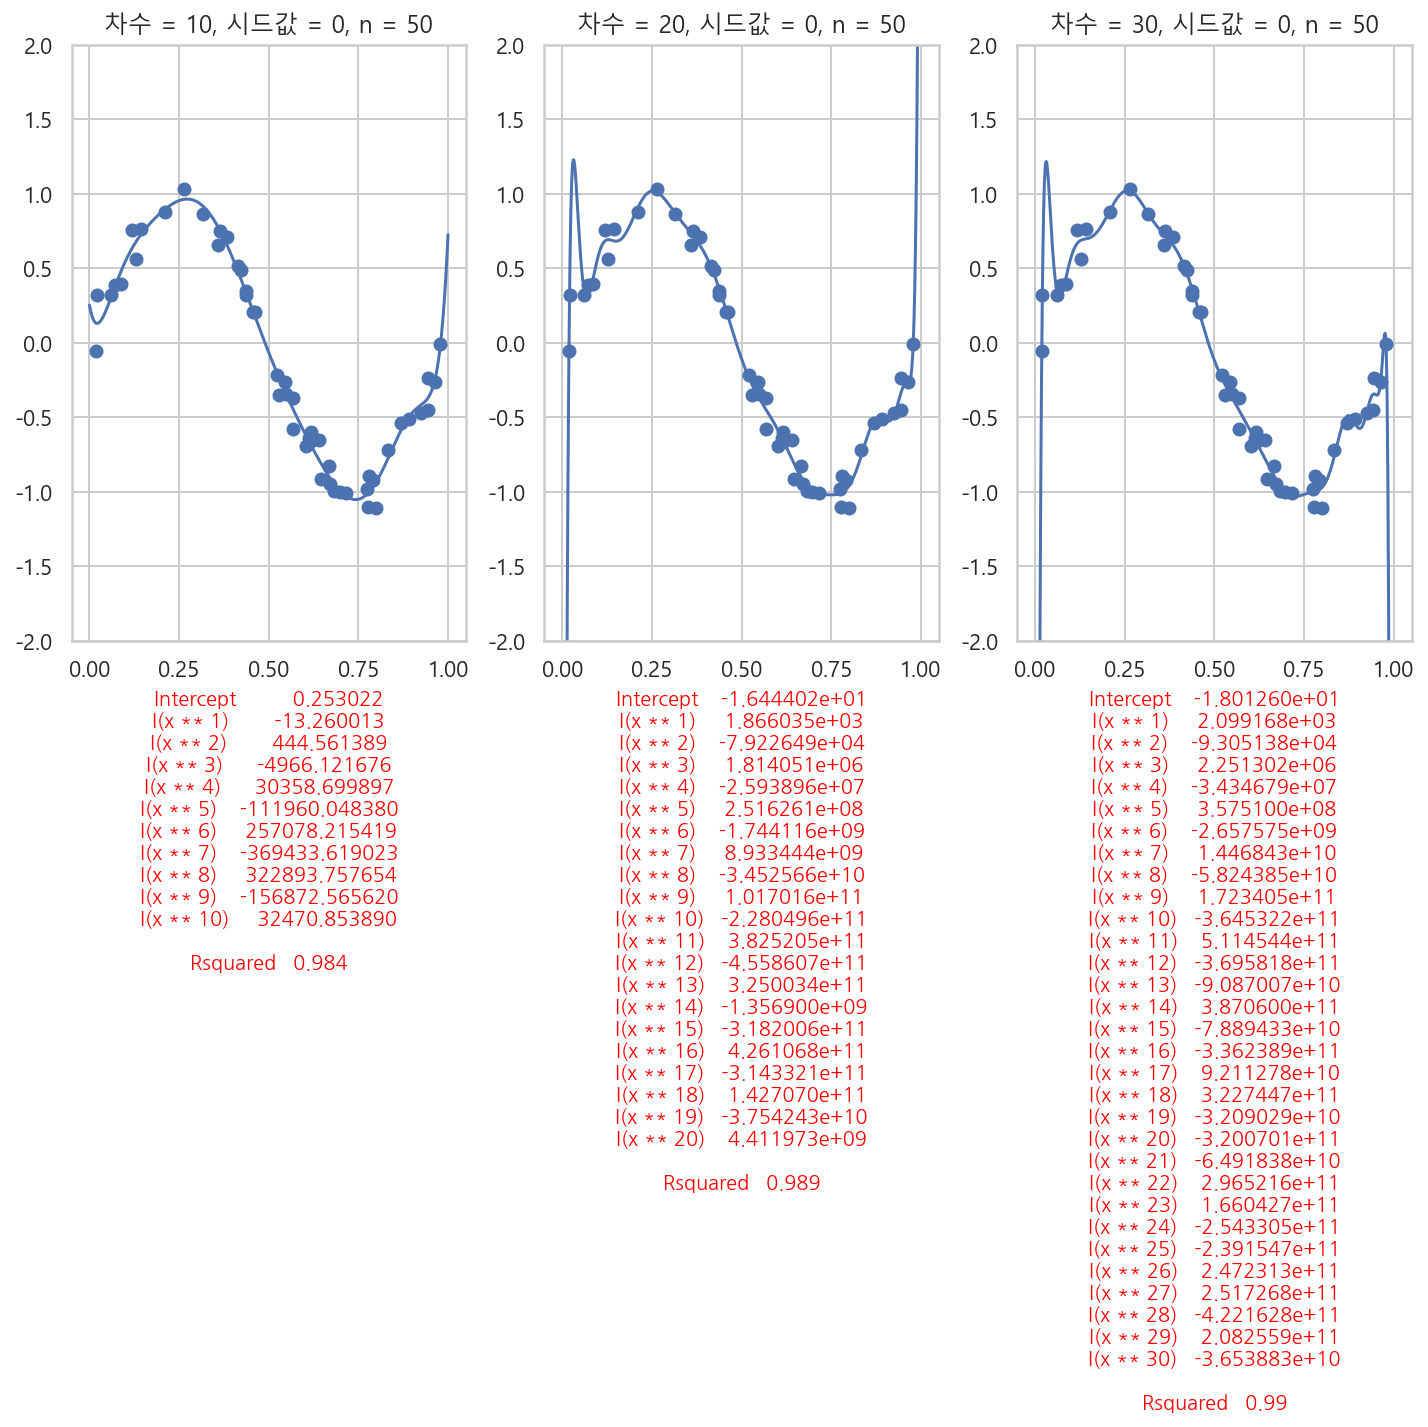

In [98]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(131)
polyreg(10, n=50, ax=ax1)

ax2 = plt.subplot(132)
polyreg(20, n=50, ax=ax2)

ax3 = plt.subplot(133)
polyreg(30, n=50, ax=ax3)

plt.tight_layout()
plt.show() ;

### 4-2. 데이터가 조금만 달라져도 가중치 값이 크게 바뀐다.
- seed 값이 달라지는 경우
- 즉 과최적화인 경우 다항회귀모형의 차수는 같지만 원본 데이터 자체가 바뀌면 가중치 값이 크게 달라진다.

degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)
degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)
degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)


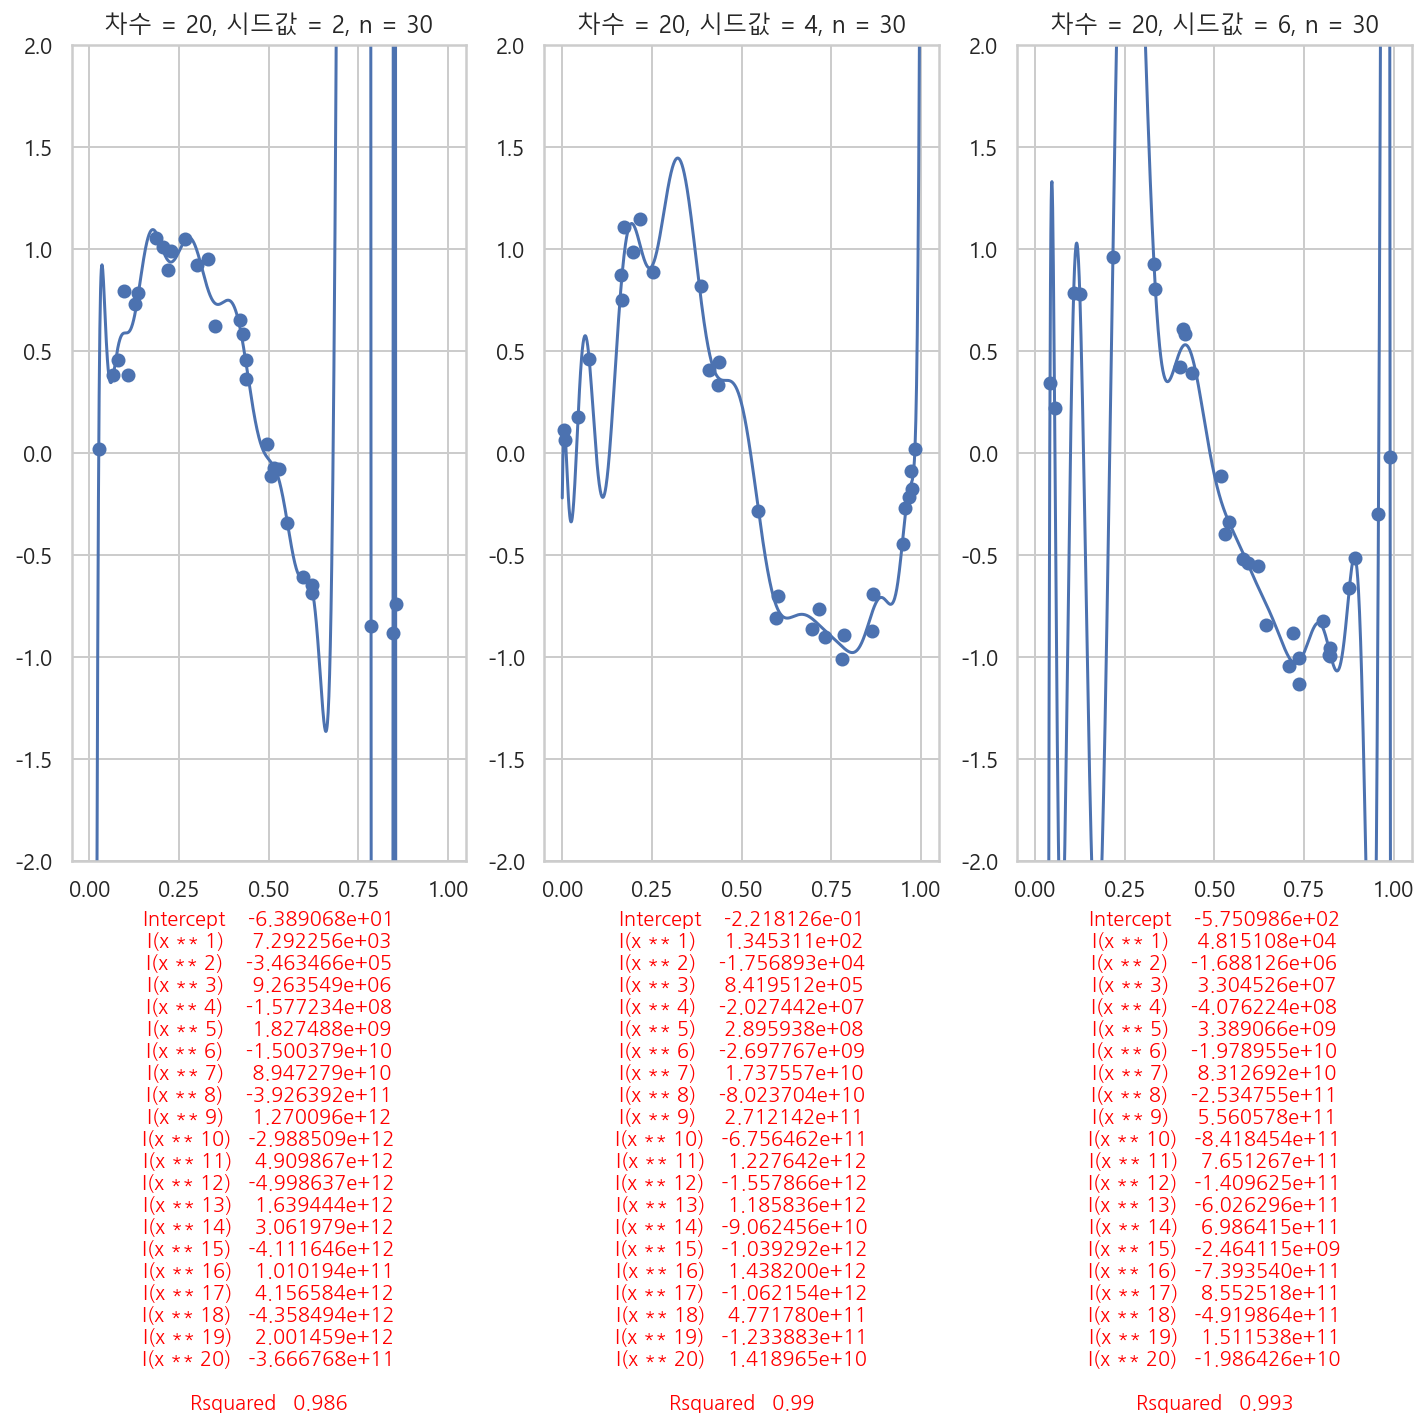

In [99]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)

ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)

ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)

plt.tight_layout()
plt.show() ; 

### 샘플수가 증가하면 과최적화가 줄어드나?

degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)
degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)
degree 20 : y ~ I(x**1) + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9) + I(x**10) + I(x**11) + I(x**12) + I(x**13) + I(x**14) + I(x**15) + I(x**16) + I(x**17) + I(x**18) + I(x**19) + I(x**20)


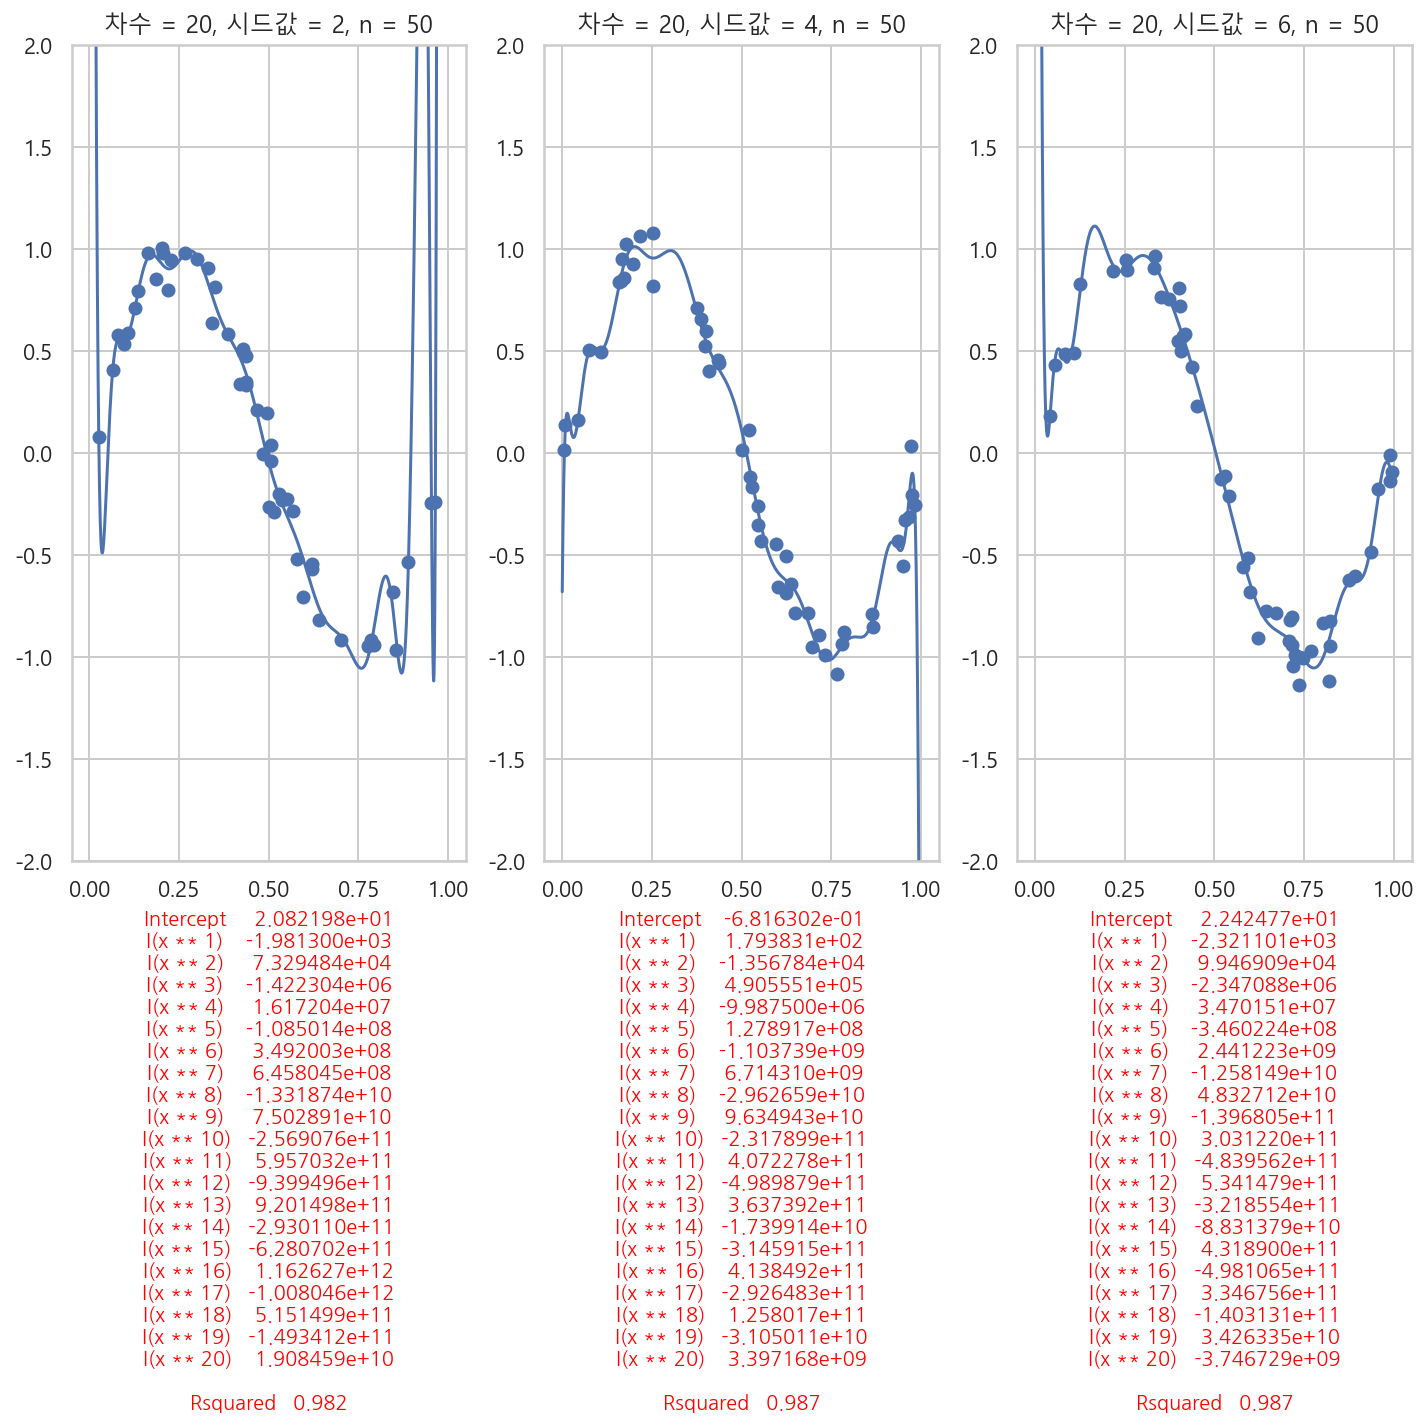

In [100]:
plt.figure(figsize=(10, 10))

ax1 = plt.subplot(131)
polyreg(20, n=50, seed=2, ax=ax1)

ax2 = plt.subplot(132)
polyreg(20, n=50, seed=4, ax=ax2)

ax3 = plt.subplot(133)
polyreg(20, n=50, seed=6, ax=ax3)

plt.tight_layout()
plt.show() ; 